# Results plotter

### Imports

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Gather results

Majority classifier, random classifiers, TF-IDF ML classifier

In [10]:
# Take table from "./predictions" dir
cwd_path = os.getcwd()
folder_path =  os.path.join(cwd_path, "predictions")   

print(folder_path)

c:\Users\Utente\Desktop\UNIVERSITA'\AI\2 Anno\Natural Language Processing\_ Esame\Project\machine-generated-text-classification\predictions


In [28]:
# Table is hand-written from results present in weights and biases
table_tfidf = pd.DataFrame()
table_deberta = pd.DataFrame()
for file in os.listdir(folder_path):
    df = pd.read_csv(os.path.join(folder_path, file))
    df = df.iloc[5:]
    df['set'] = file.split('_')[1]
    df['portion'] = file.split('_')[3]
        # table = table.append(df)
    if 'tfidf' in file:
        table_tfidf = pd.concat([table_tfidf, df], axis=0)
    else:
        table_deberta = pd.concat([table_deberta, df], axis=0)

table_tfidf = table_tfidf.reset_index(drop=True)
table_tfidf = table_tfidf.drop(columns=['Unnamed: 0'])

table_deberta = table_deberta.reset_index(drop=True)
table_deberta = table_deberta.drop(columns=['Unnamed: 0'])

table_tfidf.head(20)


,Seed,Random Accuracy,Random F1,Majority Accuracy,Majority F1,MultinomialNB Accuracy,MultinomialNB F1,SVM Accuracy,SVM F1,SGD Accuracy,SGD F1,Ensemble Accuracy,Ensemble F1,set,portion
0,Mean,0.5018,0.5149,0.4748,0.0,0.8622,0.8727,0.7210,0.7782,0.6552,0.7464,0.7189,0.7793,test,full.csv
1,Std,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0049,0.0024,0.0003,0.0001,test,full.csv
2,Mean,0.4996,0.5142,0.4748,0.0,0.8924,0.8878,0.8489,0.8495,0.7996,0.8136,0.8599,0.8607,test,subset.csv
3,Std,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0135,0.0060,0.0030,0.0042,test,subset.csv
4,Mean,0.4968,0.4962,0.5000,0.0,0.6554,0.7207,0.8634,0.8747,0.8388,0.8575,0.8417,0.8592,val,full.csv
5,Std,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0033,0.0024,0.0029,0.0021,val,full.csv
6,Mean,0.5120,0.5100,0.5000,0.0,0.7630,0.7427,0.7844,0.7425,0.8037,0.7789,0.7974,0.7671,val,subset.csv
7,Std,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0325,0.0470,0.0123,0.0187,val,subset.csv


In [29]:
table_deberta.head(20)

,Seed,distilbert frozen F1,distilbert frozen Accuracy,distilbert finetuned F1,distilbert finetuned Accuracy,deberta finetuned F1,deberta finetuned Accuracy,deberta LoRA F1,deberta LoRA Accuracy,set,portion
0,Mean,0.8058,0.7620,0.7881,0.7276,NaN,NaN,0.7259,0.6039,test,full.csv
1,Std,0.0125,0.0205,0.0073,0.0134,NaN,NaN,0.0088,0.0176,test,full.csv
2,Mean,0.8069,0.7581,0.7638,0.6861,0.7432,0.6376,0.7355,0.6213,test,subset.csv
3,Std,0.0066,0.0092,0.0063,0.0106,0.0140,0.0258,0.0197,0.0379,test,subset.csv
4,Mean,0.7051,0.7146,0.7834,0.7959,NaN,NaN,0.8748,0.8787,val,full.csv
5,Std,0.0059,0.0015,0.0130,0.0057,NaN,NaN,0.0101,0.0082,val,full.csv
6,Mean,0.6785,0.6886,0.7504,0.7706,0.8518,0.8657,0.8486,0.8566,val,subset.csv
7,Std,0.0111,0.0055,0.0136,0.0096,0.0131,0.0096,0.0062,0.0037,val,subset.csv


### Plots

In [30]:
def boxplot(file, df, metrics):
    model = 'TFIDF' if 'tfidf' in file else 'DeBERTa'
    set = 'validation' if 'val' in file else 'test'
    portion = 'the full dataset' if 'full' in file else 'a subset of the dataset'

    for metric in metrics:
    # for i,col in enumerate([columns_F1, columns_Accuracy]):
        columns_metric = columns_Accuracy = [el for el in df.columns if metric in el]
        values = df[columns_metric][:4] # no mean and variance just seeds

        # Create the box plot
        plt.figure(figsize=(12, 6))
        plt.boxplot(values, labels=[item.replace(metric, '') for item in columns_metric])
        plt.xlabel("Models")
        plt.ylabel(f"{metric+' Score' if metric=='F1' else metric}")
        plt.title(f"Box Plot of the {metric+' Score' if metric=='F1' else metric} on the {set} set trained on {portion} ")
        plt.show()

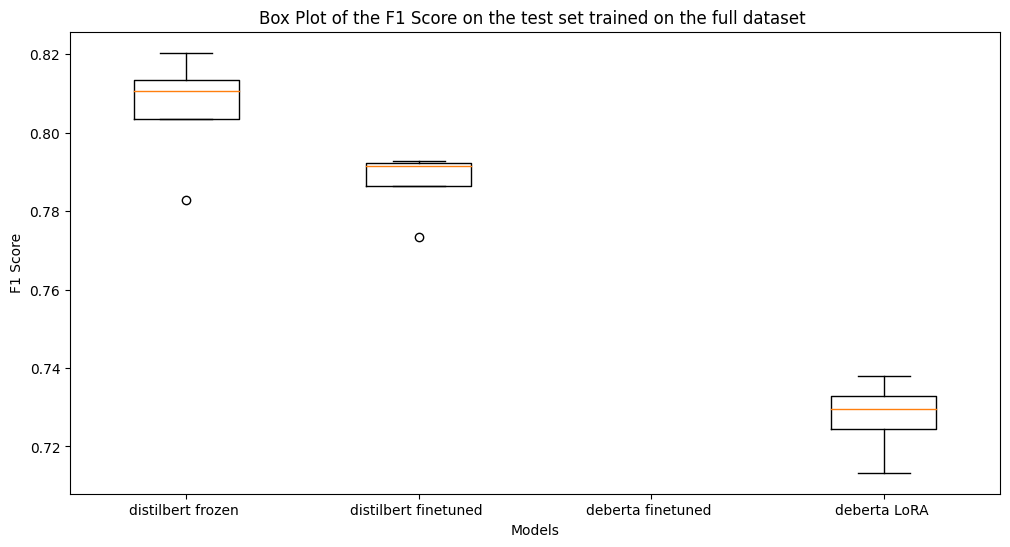

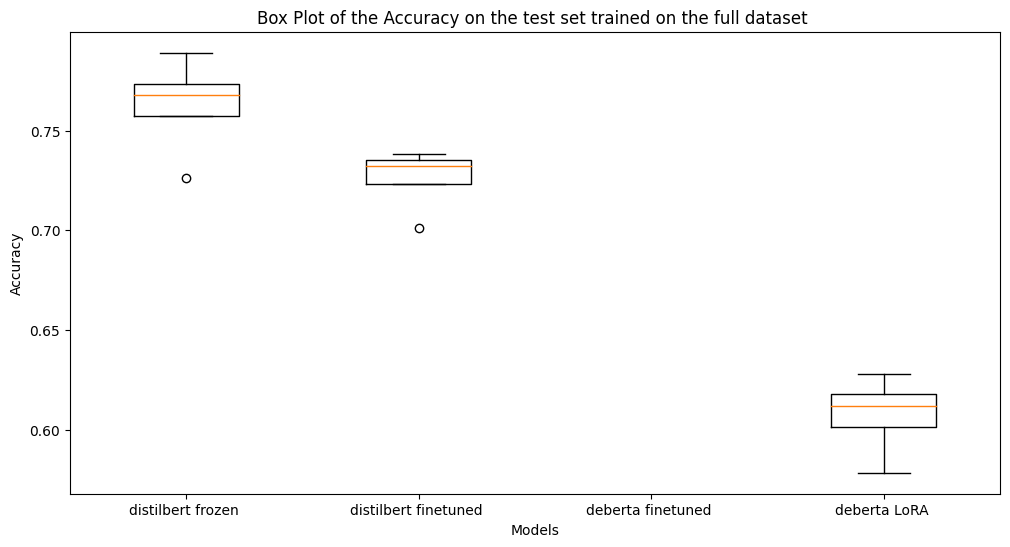

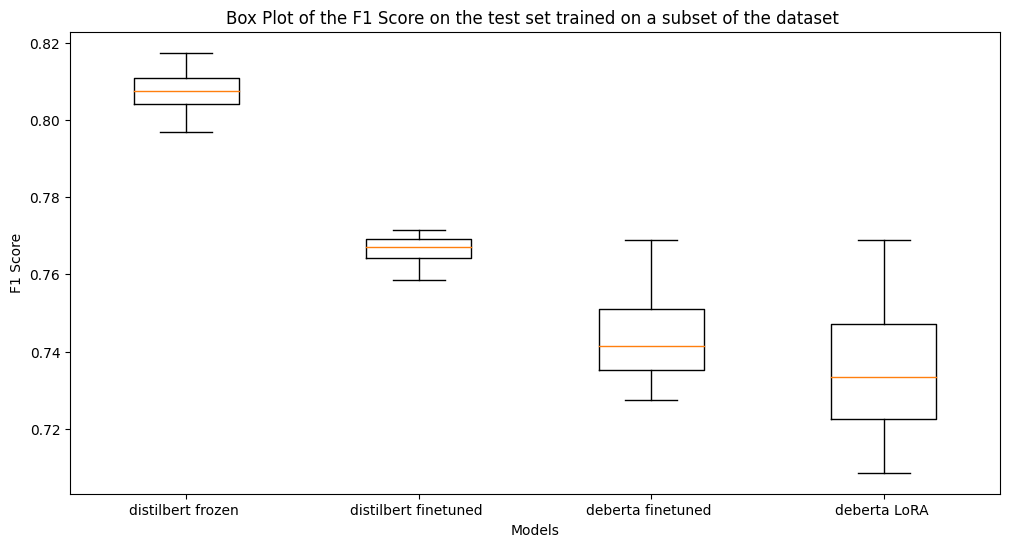

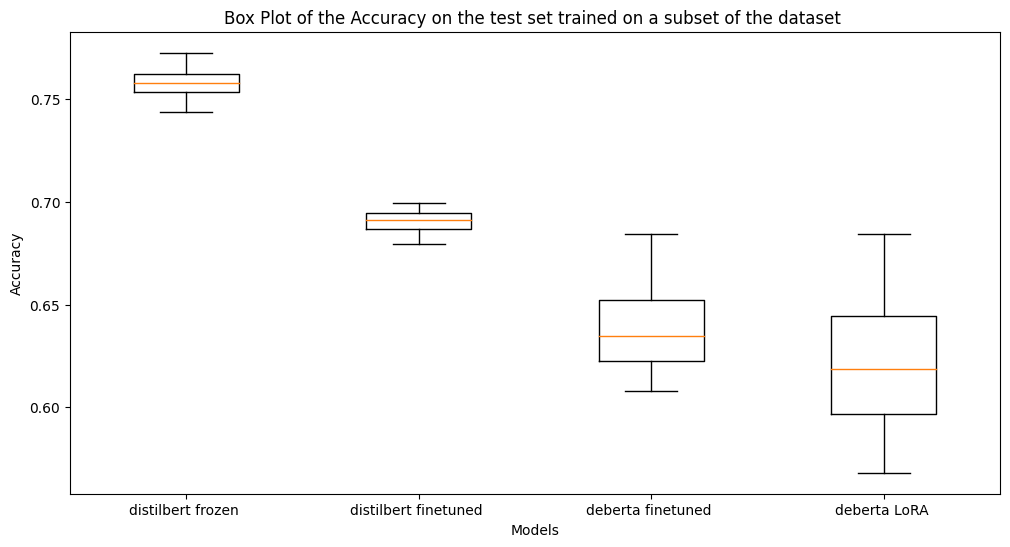

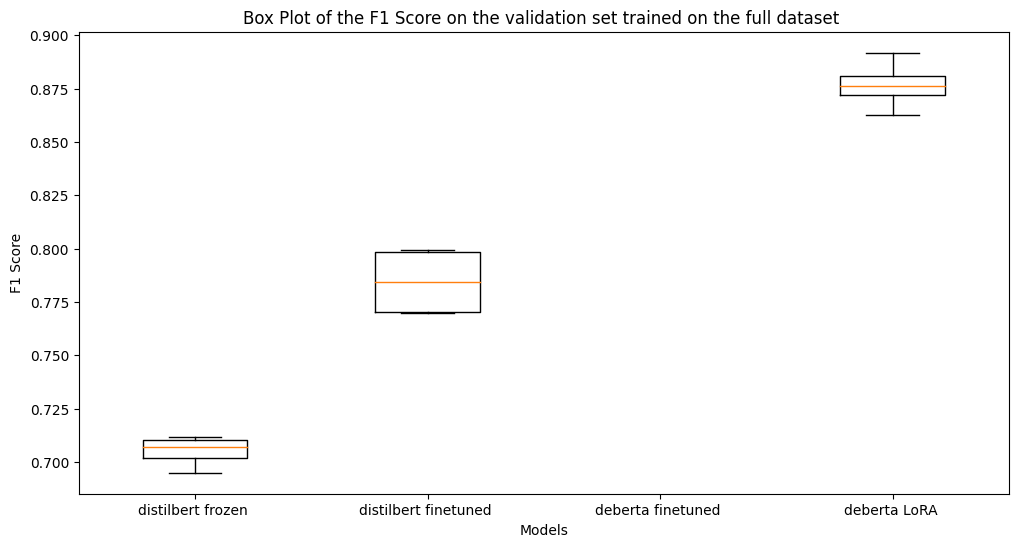

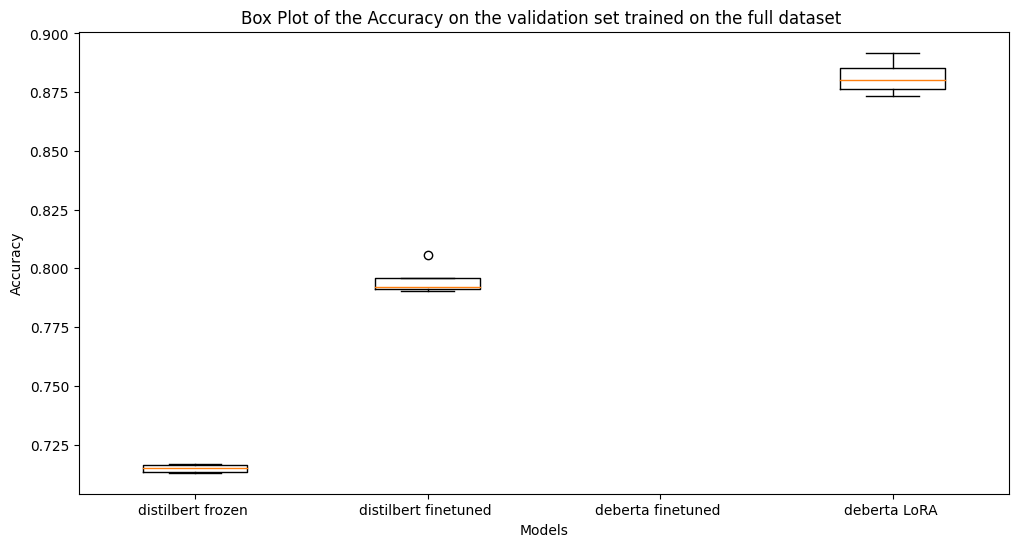

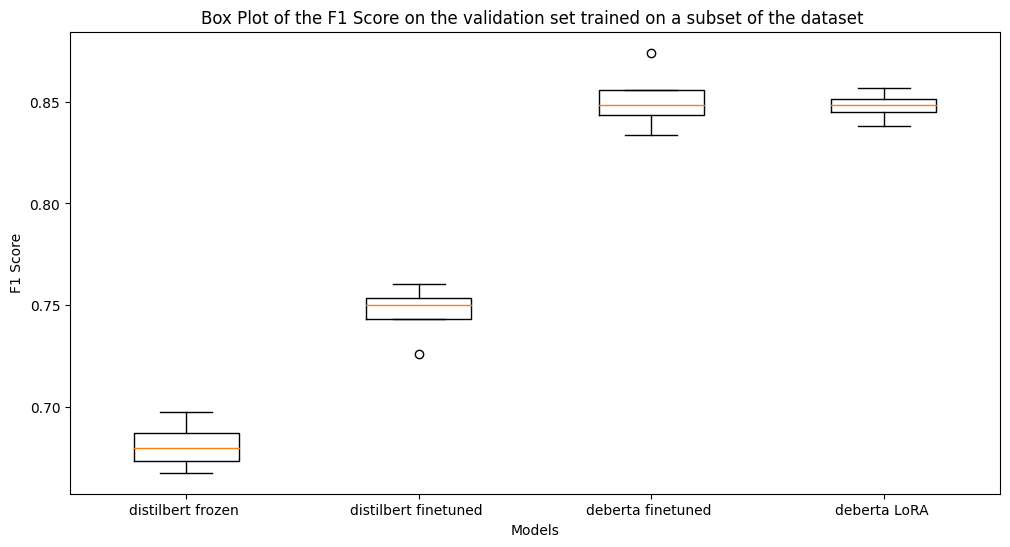

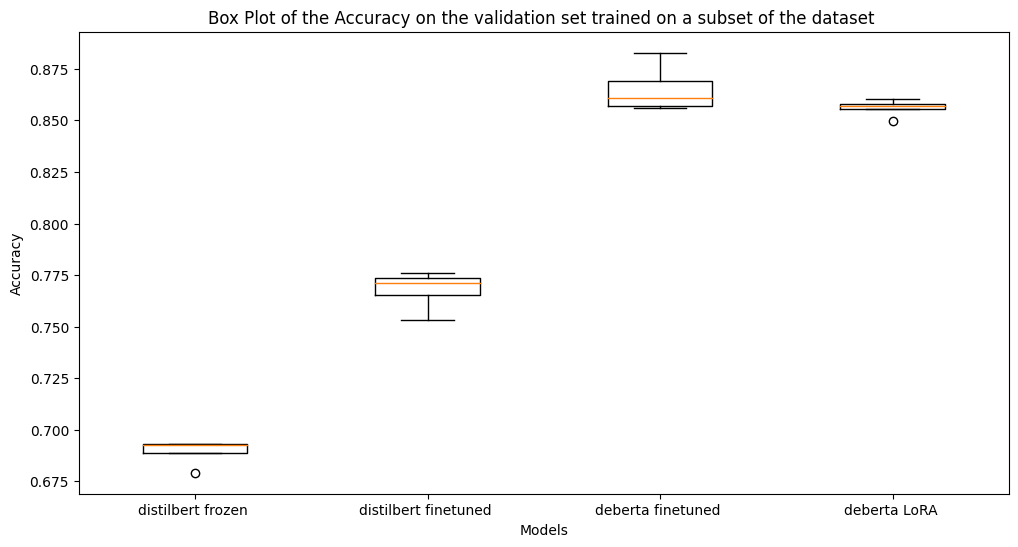

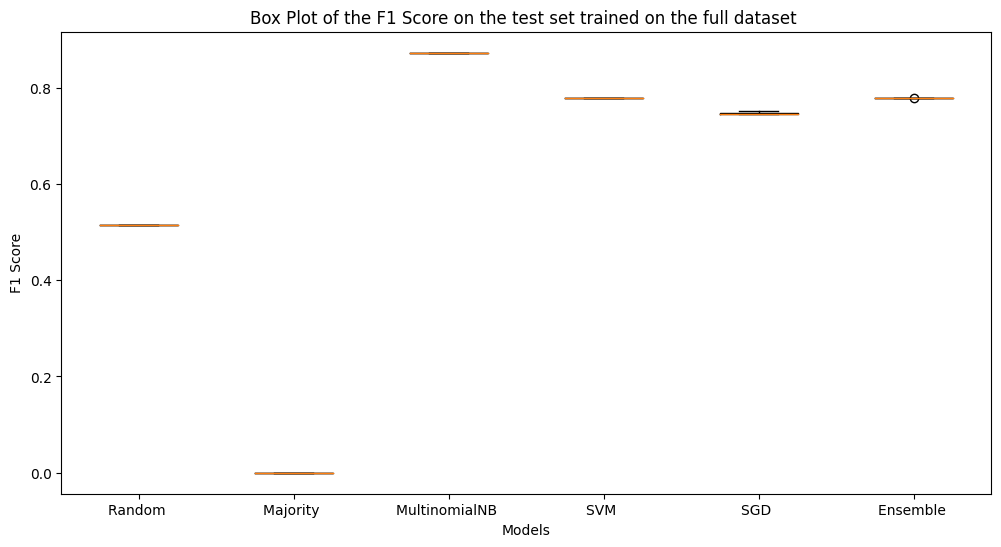

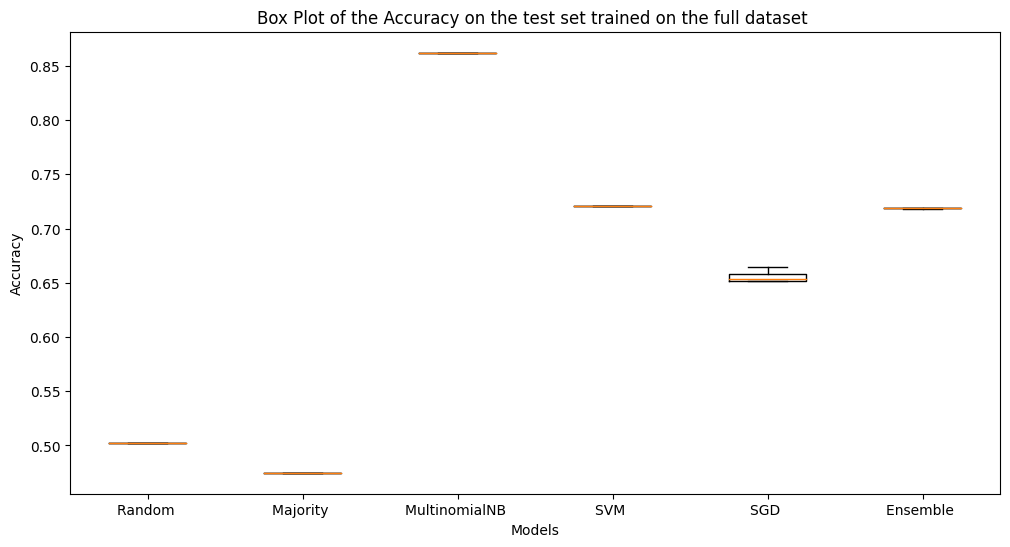

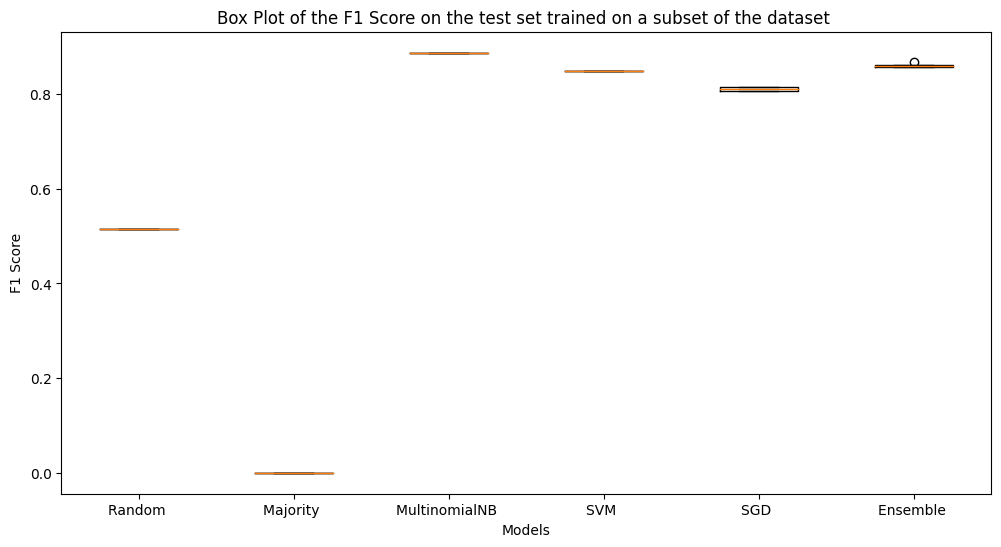

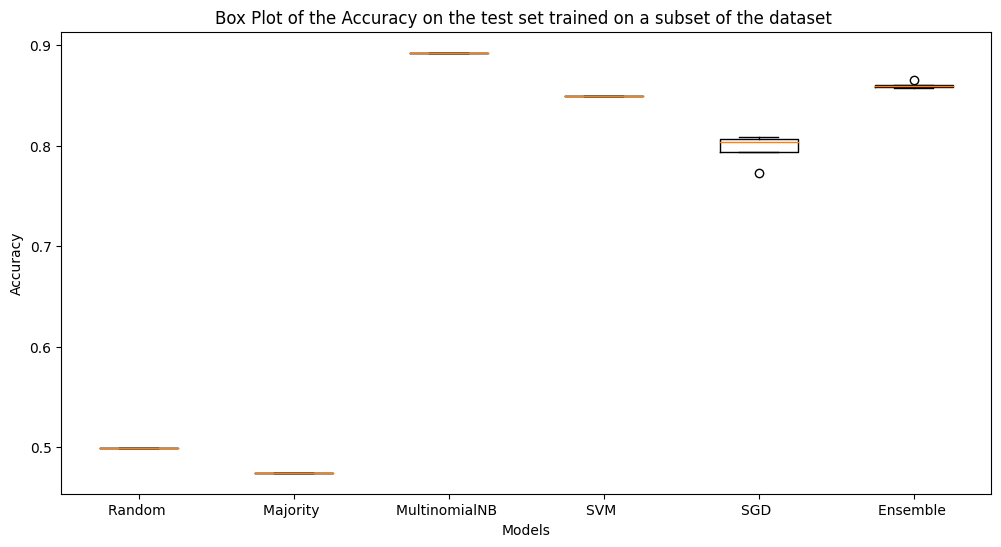

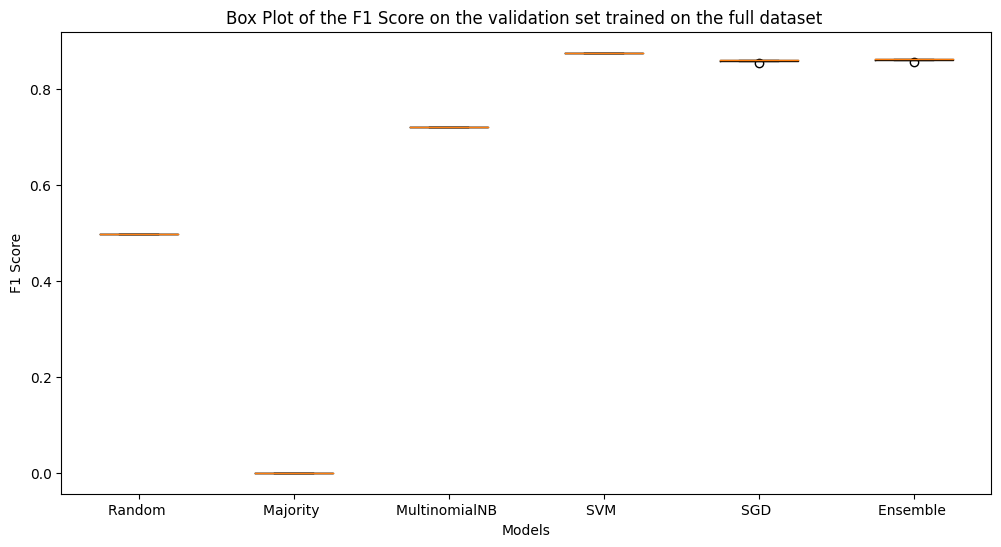

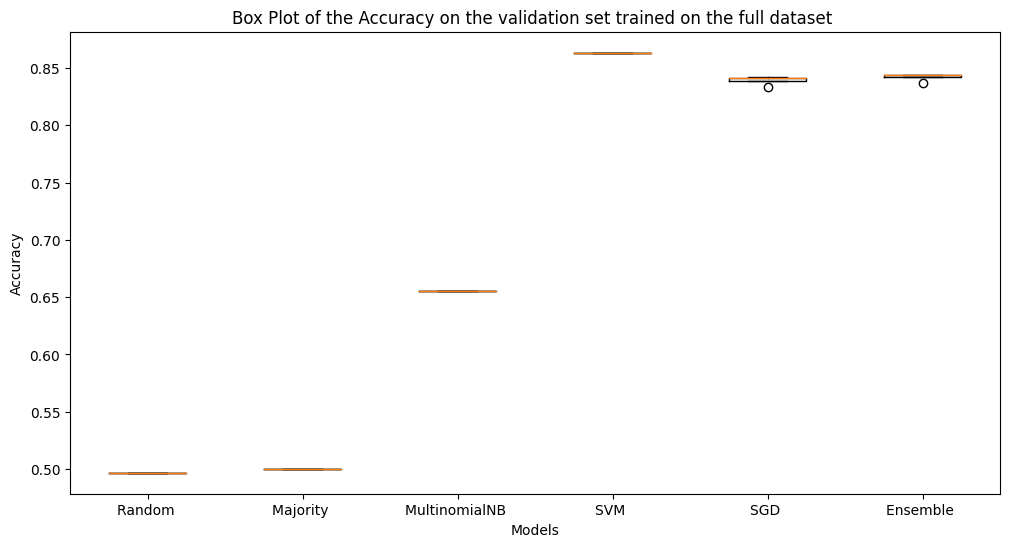

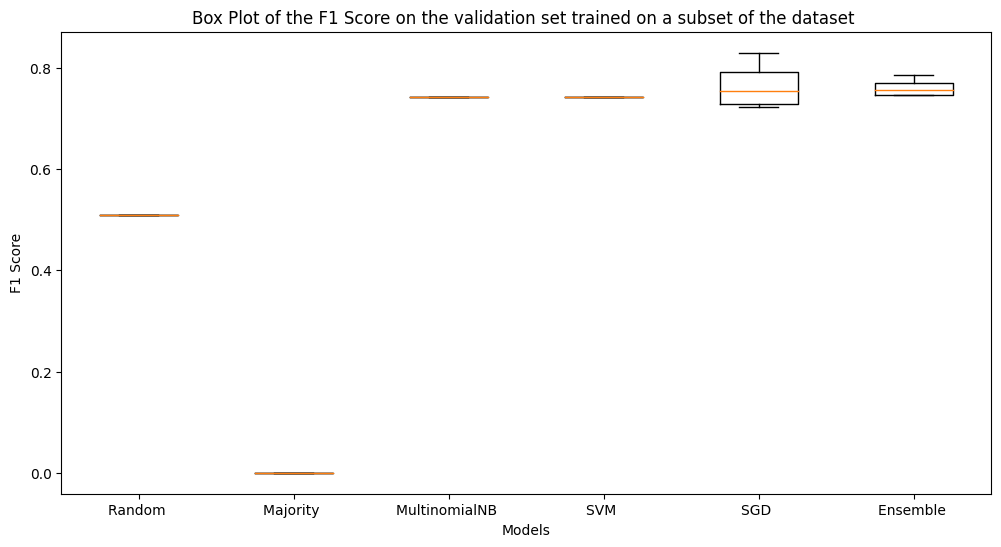

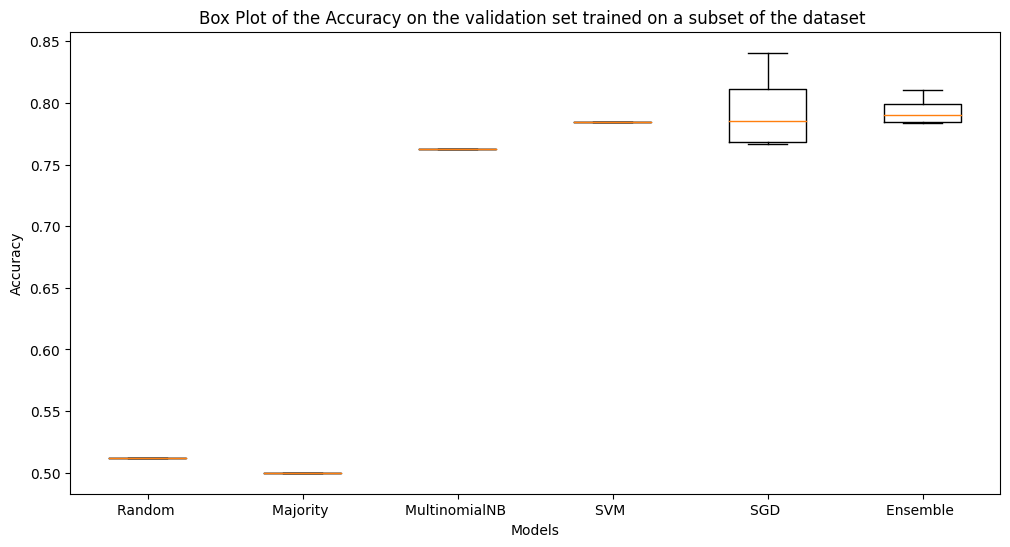

In [31]:
# Box plots of the accuracies AND F1 scores for both validation and test sets

metrics = ["F1", "Accuracy"]

for file in os.listdir(folder_path):
    # if 'tfidf' in file:
    df = pd.read_csv(os.path.join(folder_path, file))

    # Plot the boxplot
    boxplot(file, df, metrics)

In [ ]:
# A line plot of accuracy for both validation and test sets where the x-axis is the different models
# s.t. to show that as validation accuracy increases, test accuracy (weirdly) decreases

In [ ]:
# Extra: validation accuracy over training steps for a few models (e.g. one DistilBERT and one DeBERTa)